In [213]:
import numpy as np
import pandas as pd

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

### READING THE DATASET

In [215]:
credit_dat=pd.read_csv("GermanData.csv")

In [216]:
print(credit_dat.head())

  Checking_acc_status  Month_duration Credit_his Purpose  Credit_amt  \
0                 A11               6        A34     A43        1169   
1                 A12              48        A32     A43        5951   
2                 A14              12        A34     A46        2096   
3                 A11              42        A32     A42        7882   
4                 A11              24        A33     A40        4870   

  Saving_acc Present_empl  Installment_rate Personal_status Guarantors  ...  \
0        A65          A75                 4             A93       A101  ...   
1        A61          A73                 2             A92       A101  ...   
2        A61          A74                 2             A93       A101  ...   
3        A61          A74                 2             A93       A103  ...   
4        A61          A73                 3             A93       A101  ...   

   Property Age  Other_installment Housing Existing_credits   Job  \
0      A121  67        

In [217]:
credit_dat.shape


(1000, 21)

In [ ]:
dataset=credit_dat.dropna(axis=0)

### DATA PRE-PROCESSING

In [219]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

credit_dat["Checking_acc_status"] = le.fit_transform(credit_dat["Checking_acc_status"])
credit_dat["Credit_his"] = le.fit_transform(credit_dat["Credit_his"])
credit_dat["Purpose"] = le.fit_transform(credit_dat["Purpose"])
credit_dat["Saving_acc"] = le.fit_transform(credit_dat["Saving_acc"])
credit_dat["Present_empl"] = le.fit_transform(credit_dat["Present_empl"])
credit_dat["Personal_status"] = le.fit_transform(credit_dat["Personal_status"])
credit_dat["Guarantors"] = le.fit_transform(credit_dat["Guarantors"])
credit_dat["Property"] = le.fit_transform(credit_dat["Property"])
credit_dat["Other_installment"] = le.fit_transform(credit_dat["Other_installment"])
credit_dat["Housing"] = le.fit_transform(credit_dat["Housing"])
credit_dat["Job"] = le.fit_transform(credit_dat["Job"])
credit_dat["Telephone"] = le.fit_transform(credit_dat["Telephone"])
credit_dat["Foreign_workers"] = le.fit_transform(credit_dat["Foreign_workers"])





In [220]:
credit_dat.head(20)

,Checking_acc_status,Month_duration,Credit_his,Purpose,Credit_amt,Saving_acc,Present_empl,Installment_rate,Personal_status,Guarantors,...,Property,Age,Other_installment,Housing,Existing_credits,Job,Liable_people,Telephone,Foreign_workers,Credit_risk
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,1
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,1
5,3,36,2,7,9055,4,2,2,2,0,...,3,35,2,2,1,1,2,1,0,1
6,3,24,2,3,2835,2,4,3,2,0,...,1,53,2,1,1,2,1,0,0,1
7,1,36,2,1,6948,0,2,2,2,0,...,2,35,2,0,1,3,1,1,0,1
8,3,12,2,4,3059,3,3,2,0,0,...,0,61,2,1,1,1,1,0,0,1
9,1,30,4,0,5234,0,0,4,3,0,...,2,28,2,1,2,3,1,0,0,1


In [222]:
target=credit_dat["Credit_risk"]

In [224]:
data=credit_dat.drop(columns=["Credit_risk"])

In [225]:
data.head()

,Checking_acc_status,Month_duration,Credit_his,Purpose,Credit_amt,Saving_acc,Present_empl,Installment_rate,Personal_status,Guarantors,Present_residence,Property,Age,Other_installment,Housing,Existing_credits,Job,Liable_people,Telephone,Foreign_workers
0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0
1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0
2,3,12,4,7,2096,0,3,2,2,0,3,0,49,2,1,1,1,2,0,0
3,0,42,2,3,7882,0,3,2,2,2,4,1,45,2,2,1,2,2,0,0
4,0,24,3,0,4870,0,2,3,2,0,4,3,53,2,2,2,2,2,0,0


In [226]:
CrossTabResult=pd.crosstab(index=credit_dat['Checking_acc_status'], columns=credit_dat['Credit_risk'])
CrossTabResult

Credit_risk,1,2
Checking_acc_status,,
0,144,130
1,169,100
2,50,13
3,348,46


In [227]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data, target, test_size=0.3,random_state=0)

### SPLITTING IN DATA INTO TRAIN AND TEST 

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)

In [229]:
pd.DataFrame(x_train_sc).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,-1.300547e-16,-1.947648e-16,-8.168069e-18,-1.141944e-17,-2.537653e-18,-6.141912e-17,1.170492e-16,9.040387e-17,-4.567775e-17,-2.269613e-16,2.267432e-16,2.458351e-17,2.629643e-16,5.460711e-16,1.402846e-16,7.993606e-17,-7.803282e-17,-2.087219e-16,8.628019e-17,6.907173e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-1.238563e+00,-1.406129e+00,-2.347241e+00,-1.200045e+00,-1.052946e+00,-6.968492e-01,-2.021332e+00,-1.798625e+00,-2.360808e+00,-3.056085e-01,-1.728627e+00,-1.292264e+00,-1.448393e+00,-2.472554e+00,-1.760318e+00,-7.159175e-01,-2.916919e+00,-4.177280e-01,-8.584711e-01,-1.924501e-01
25%,-1.238563e+00,-7.420776e-01,-5.093566e-01,-8.360796e-01,-6.752150e-01,-6.968492e-01,-3.557258e-01,-9.005953e-01,-9.744275e-01,-3.056085e-01,-8.056375e-01,-1.292264e+00,-7.666818e-01,4.412302e-01,1.441991e-01,-7.159175e-01,1.535221e-01,-4.177280e-01,-8.584711e-01,-1.924501e-01
50%,-4.446125e-01,-2.440390e-01,-5.093566e-01,-1.081496e-01,-3.427244e-01,-6.968492e-01,-3.557258e-01,-2.565798e-03,4.119531e-01,-3.056085e-01,1.173515e-01,-3.390662e-01,-2.553983e-01,4.412302e-01,1.441991e-01,-7.159175e-01,1.535221e-01,-4.177280e-01,-8.584711e-01,-1.924501e-01
75%,1.143289e+00,2.539997e-01,1.328528e+00,2.558154e-01,2.640032e-01,5.619751e-01,1.309880e+00,8.954637e-01,4.119531e-01,-3.056085e-01,1.040340e+00,6.141320e-01,5.967409e-01,4.412302e-01,1.441991e-01,1.006221e+00,1.535221e-01,-4.177280e-01,1.164862e+00,-1.924501e-01
max,1.143289e+00,4.238309e+00,1.328528e+00,2.075640e+00,5.286995e+00,1.820799e+00,1.309880e+00,8.954637e-01,1.798334e+00,3.889017e+00,1.040340e+00,1.567330e+00,3.323586e+00,4.412302e-01,2.048716e+00,4.450498e+00,1.688743e+00,2.393903e+00,1.164862e+00,5.196152e+00


### LOGISTIC REGRESSION

In [230]:
from sklearn. linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sc, y_train)
pred_train_lr=lr.predict(x_train_sc)

In [231]:
from sklearn.metrics import accuracy_score
l_train=(accuracy_score(pred_train_lr, y_train))

pred_test_lr=lr.predict(x_test_sc)
l_test=(accuracy_score(pred_test_lr, y_test))
print("Train Accuracy:",l_train)
print("Test Accuracy:",l_test)

Train Accuracy: 0.7671428571428571
Test Accuracy: 0.7533333333333333


### K-NEAREST NEIGHBOUR

In [232]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [233]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [234]:
pred_train_knn=knn.predict(x_train)
pred_test_knn=knn.predict(x_test)

In [235]:
k_train=accuracy_score(pred_train_knn, y_train)
k_test=accuracy_score(pred_test_knn, y_test)
print("Train Accuracy:",k_train)
print("Test Accuracy:",k_test)

Train Accuracy: 0.7628571428571429
Test Accuracy: 0.6833333333333333


### KNN FOR DIFFERENT VALUES OF 'K'

In [236]:
for k in range(1,11):
  print("k: ", k)
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  print("Train Accuracy:",accuracy_score(knn.predict(x_train),y_train))
  print("Test Accuracy:",accuracy_score(knn.predict(x_test), y_test))

k:  1
Train Accuracy: 1.0
Test Accuracy: 0.61
k:  2
Train Accuracy: 0.8085714285714286
Test Accuracy: 0.6833333333333333
k:  3
Train Accuracy: 0.7885714285714286
Test Accuracy: 0.6666666666666666
k:  4
Train Accuracy: 0.76
Test Accuracy: 0.7133333333333334
k:  5
Train Accuracy: 0.7628571428571429
Test Accuracy: 0.6833333333333333
k:  6
Train Accuracy: 0.7542857142857143
Test Accuracy: 0.7033333333333334
k:  7
Train Accuracy: 0.7471428571428571
Test Accuracy: 0.6833333333333333
k:  8
Train Accuracy: 0.7414285714285714
Test Accuracy: 0.7066666666666667
k:  9
Train Accuracy: 0.7385714285714285
Test Accuracy: 0.7033333333333334
k:  10
Train Accuracy: 0.7242857142857143
Test Accuracy: 0.7133333333333334


### NAIVE BAYES

In [237]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train_sc, y_train)

GaussianNB()

In [238]:
from sklearn.metrics import accuracy_score
nb_train=accuracy_score(nb.predict(x_train_sc), y_train)
nb_test=accuracy_score(nb.predict(x_test_sc), y_test)
print("Train Accuracy:", nb_train)
print("Test Accuracy:",nb_test)

Train Accuracy: 0.7257142857142858
Test Accuracy: 0.73


### DECISION TREE

In [239]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train_sc, y_train)

DecisionTreeClassifier()

In [240]:
dt_train=accuracy_score(dt.predict(x_train_sc), y_train)
dt_test=accuracy_score(dt.predict(x_test_sc),y_test)
print("Train Accuracy:",dt_train)
print("Test Accuracy:",dt_test)

Train Accuracy: 1.0
Test Accuracy: 0.6533333333333333


In [241]:
dt1=DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [242]:
dt_train1=accuracy_score(dt1.predict(x_train_sc), y_train)
dt_test1=accuracy_score(dt1.predict(x_test_sc),y_test)
print("Training Accuracy:",dt_train1)
print("Testing Accuracy:",dt_test1)

Training Accuracy: 0.7042857142857143
Testing Accuracy: 0.7266666666666667


### SUPPORT VECTOR MACHINE

In [243]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train, y_train)

SVC()

In [244]:
pred_train=svc.predict(x_train)

In [245]:
from sklearn.metrics import accuracy_score
sv_train=accuracy_score(pred_train, y_train)
pred_test=svc.predict(x_test)
print("Training Accuracy:",sv_train)
sv_test=accuracy_score(pred_test, y_test)
print("Testing Accuracy:",sv_test)

Training Accuracy: 0.72
Testing Accuracy: 0.7233333333333334


### GRAPH OF TRAINING ACCURACY OF ABOVE ALGORITHMS

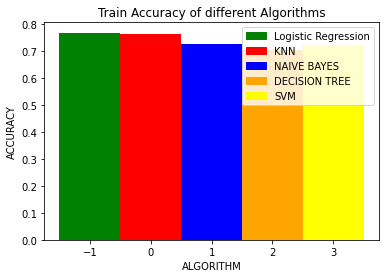

In [246]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
x=np.arange(1)
w=1
plt.bar(x-w,l_train,w,color='green')
plt.bar(x,k_train,w,color='red')
plt.bar(x+w,nb_train,w,color='blue')
plt.bar(x+w+1,dt_train1,w,color='orange')
plt.bar(x+w+2,sv_train,w,color='yellow')

green_patch=mpatches.Patch(color='green',label='Logistic Regression')
red_patch=mpatches.Patch(color='red',label='KNN')
blue_patch=mpatches.Patch(color='blue',label='NAIVE BAYES')
orange_patch=mpatches.Patch(color='orange',label='DECISION TREE')
yellow_patch=mpatches.Patch(color='yellow',label='SVM')
plt.legend(handles=[green_patch,red_patch,blue_patch,orange_patch,yellow_patch])
plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")
plt.title("Train Accuracy of different Algorithms")

plt.show()




### GRAPH OF TESTING ACCURACY OF ABOVE ALGORITHMS

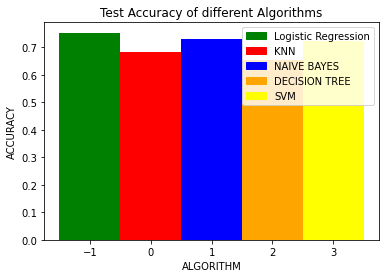

In [247]:

x=np.arange(1)
w=1
plt.bar(x-w,l_test,w,color='green')
plt.bar(x,k_test,w,color='red')
plt.bar(x+w,nb_test,w,color='blue')
plt.bar(x+w+1,dt_test,w,color='orange')
plt.bar(x+w+2,sv_test,w,color='yellow')

green_patch=mpatches.Patch(color='green',label='Logistic Regression')
red_patch=mpatches.Patch(color='red',label='KNN')
blue_patch=mpatches.Patch(color='blue',label='NAIVE BAYES')
orange_patch=mpatches.Patch(color='orange',label='DECISION TREE')
yellow_patch=mpatches.Patch(color='yellow',label='SVM')
plt.legend(handles=[green_patch,red_patch,blue_patch,orange_patch,yellow_patch])
plt.xlabel("ALGORITHM")
plt.ylabel("ACCURACY")
plt.title("Test Accuracy of different Algorithms")

plt.show()
